# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,Flatten, Conv2D, AveragePooling2D, BatchNormalization, Dropout, MaxPooling1D, GlobalAveragePooling1D, LSTM
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model

# Importing Dataset and combining them

In [2]:
RAVDESS='dataset/RAVDESS/audio_speech_actors_01-24/'
CREMA_D='dataset/CREMA-D/AudioWAV/'
TESS='dataset/TESS/TESS Toronto emotional speech set data/'
SAVEE='dataset/SAVEE/ALL/'

In [5]:
ravdess_list = os.listdir(RAVDESS)

files = []
emotions = []

for item in ravdess_list:
    actor = os.listdir(RAVDESS + item)
    for file in actor:
        name = file.split('.')[0]
        parts = name.split('-')
        emotions.append(int(parts[2]))
        files.append(RAVDESS + item + '/' + file)

ravdess_df = pd.concat([pd.DataFrame(emotions, columns=['Emotions']), pd.DataFrame(files, columns=['Files'])], axis=1)

ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

ravdess_df

,Emotions,Files
0,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
1,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
2,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
3,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
4,calm,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
...,...,...
1435,surprise,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
1436,surprise,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
1437,surprise,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
1438,surprise,dataset/RAVDESS/audio_speech_actors_01-24/Acto...


In [10]:
crema = os.listdir(CREMA_D)
emotions = []
files = []

for item in crema:
    files.append(CREMA_D + item)
    
    parts = item.split('_')
    if parts[2] == 'SAD':
        emotions.append('sad')
    elif parts[2] == 'ANG':
        emotions.append('angry')
    elif parts[2] == 'DIS':
        emotions.append('disgust')
    elif parts[2] == 'FEA':
        emotions.append('fear')
    elif parts[2] == 'HAP':
        emotions.append('happy')
    elif parts[2] == 'NEU':
        emotions.append('neutral')
    else :
        emotions.append('unknown')

crema_df = pd.concat([pd.DataFrame(emotions, columns=['Emotions']), pd.DataFrame(files, columns=['Files'])], axis=1)

crema_df

,Emotions,Files
0,angry,dataset/CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,dataset/CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,dataset/CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,dataset/CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,dataset/CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav
...,...,...
7437,disgust,dataset/CREMA-D/AudioWAV/1091_WSI_DIS_XX.wav
7438,fear,dataset/CREMA-D/AudioWAV/1091_WSI_FEA_XX.wav
7439,happy,dataset/CREMA-D/AudioWAV/1091_WSI_HAP_XX.wav
7440,neutral,dataset/CREMA-D/AudioWAV/1091_WSI_NEU_XX.wav


In [18]:
tess = os.listdir(TESS)
emotions = []
files = []

for item in tess:
    items = os.listdir(TESS + item)
    for file in items:
        try:
            part = file.split('.')[0]
            part = part.split('_')[2]
        except:
            print('error at',part)
        if part == 'ps':
            emotions.append('surprise')
        else:
            emotions.append(part)
        files.append(TESS + item + '/' + file)
        
tess_df = pd.concat([pd.DataFrame(emotions, columns=['Emotions']), pd.DataFrame(files, columns=['Files'])], axis=1)

tess_df

error at OAF_angry
error at OAF_disgust
error at OAF_Fear
error at OAF_happy
error at OAF_neutral
error at OAF_Sad
error at YAF_angry
error at YAF_disgust
error at YAF_fear
error at YAF_happy
error at YAF_neutral
error at YAF_sad


,Emotions,Files
0,angry,dataset/TESS/TESS Toronto emotional speech set...
1,angry,dataset/TESS/TESS Toronto emotional speech set...
2,angry,dataset/TESS/TESS Toronto emotional speech set...
3,angry,dataset/TESS/TESS Toronto emotional speech set...
4,angry,dataset/TESS/TESS Toronto emotional speech set...
...,...,...
2809,sad,dataset/TESS/TESS Toronto emotional speech set...
2810,sad,dataset/TESS/TESS Toronto emotional speech set...
2811,sad,dataset/TESS/TESS Toronto emotional speech set...
2812,sad,dataset/TESS/TESS Toronto emotional speech set...


In [19]:
savee = os.listdir(SAVEE)

emotions = []
files = []

for item in savee:
    files.append(SAVEE + item)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        emotions.append('angry')
    elif ele == 'd':
        emotions.append('disgust')
    elif ele == 'f':
        emotions.append('fear')
    elif ele == 'h':
        emotions.append('happy')
    elif ele == 'n':
        emotions.append('neutral')
    elif ele == 'sa':
        emotions.append('sad')
    else:
        emotions.append('surprise')
        
savee_df = pd.concat([pd.DataFrame(emotions, columns=['Emotions']), pd.DataFrame(files, columns=['Files'])], axis=1)
savee_df

,Emotions,Files
0,surprise,dataset/SAVEE/ALL/DC_a01.wav
1,surprise,dataset/SAVEE/ALL/DC_a02.wav
2,surprise,dataset/SAVEE/ALL/DC_a03.wav
3,surprise,dataset/SAVEE/ALL/DC_a04.wav
4,surprise,dataset/SAVEE/ALL/DC_a05.wav
...,...,...
475,surprise,dataset/SAVEE/ALL/KL_su11.wav
476,surprise,dataset/SAVEE/ALL/KL_su12.wav
477,surprise,dataset/SAVEE/ALL/KL_su13.wav
478,surprise,dataset/SAVEE/ALL/KL_su14.wav


In [20]:
df = pd.concat([ravdess_df, crema_df, tess_df, savee_df], axis = 0)
df.to_csv("df.csv",index=False)
df

,Emotions,Files
0,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
1,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
2,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
3,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
4,calm,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
...,...,...
475,surprise,dataset/SAVEE/ALL/KL_su11.wav
476,surprise,dataset/SAVEE/ALL/KL_su12.wav
477,surprise,dataset/SAVEE/ALL/KL_su13.wav
478,surprise,dataset/SAVEE/ALL/KL_su14.wav


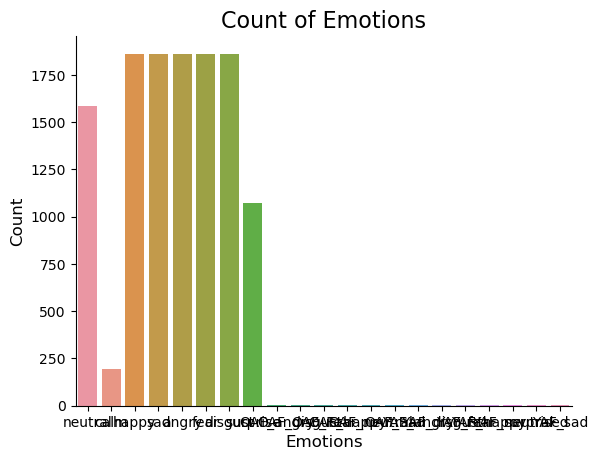

In [21]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=Feat['Emotions'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Data Augmentation

In [7]:
df=pd.read_csv('df.csv')

In [8]:
df.head(3)

,Emotions,Files
0,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
1,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
2,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...


In [12]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size = data.shape[0])
    return data

In [13]:
def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate = rate)

In [14]:
def shift(data):
    shift_range = int(np.random.uniform(low = -5, high = 5) * 1000)
    return np.roll(data, shift_range)

In [15]:
def pitch(data, sampling_rate, pitch_factor = 0.7):
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = pitch_factor)

In [18]:
df=pd.DataFrame(columns=[])

In [16]:
df

,Emotions,Files
0,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
1,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
2,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
3,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
4,calm,dataset/RAVDESS/audio_speech_actors_01-24/Acto...
...,...,...
12171,surprise,dataset/SAVEE/ALL/KL_su11.wav
12172,surprise,dataset/SAVEE/ALL/KL_su12.wav
12173,surprise,dataset/SAVEE/ALL/KL_su13.wav
12174,surprise,dataset/SAVEE/ALL/KL_su14.wav


In [24]:
Features=pd.read_csv('features.csv')

In [25]:
Features.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [26]:
Features.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Y
12159,0.020830,0.572305,0.569089,0.547850,0.542482,0.597099,0.669950,0.589656,0.544739,0.494076,...,2.294656e-08,1.014751e-08,7.922847e-09,7.696167e-09,7.643274e-09,7.707054e-09,7.298141e-09,4.527691e-09,8.030276e-10,surprise
12160,0.030239,0.594086,0.562729,0.557540,0.550606,0.608397,0.599722,0.587235,0.595722,0.603532,...,4.123118e-08,1.590860e-08,8.327601e-09,7.817274e-09,7.862517e-09,7.473210e-09,7.116405e-09,4.014409e-09,4.330833e-10,surprise
12161,0.042125,0.606617,0.626361,0.617702,0.605073,0.585899,0.587951,0.605878,0.632796,0.592869,...,5.627950e-08,1.843745e-08,9.218674e-09,8.212020e-09,8.066188e-09,7.723968e-09,7.815336e-09,4.414116e-09,5.284740e-10,surprise


In [21]:
set(list(Features.Y))

{'angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'}

In [22]:
Features.tail()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Y
12157,0.014098,0.619824,0.614484,0.598313,0.593626,0.623434,0.629704,0.562655,0.605842,0.638438,...,5.926112e-08,2.306617e-08,1.480507e-08,1.365686e-08,1.417825e-08,1.369344e-08,1.307038e-08,9.077405e-09,3.690241e-09,surprise
12158,0.029268,0.591178,0.611471,0.558338,0.514421,0.528130,0.601409,0.582014,0.606173,0.600072,...,2.724432e-08,1.231536e-08,9.374466e-09,8.345244e-09,8.411244e-09,8.088925e-09,7.585115e-09,4.324797e-09,4.679711e-10,surprise
12159,0.020830,0.572305,0.569089,0.547850,0.542482,0.597099,0.669950,0.589656,0.544739,0.494076,...,2.294656e-08,1.014751e-08,7.922847e-09,7.696167e-09,7.643274e-09,7.707054e-09,7.298141e-09,4.527691e-09,8.030276e-10,surprise
12160,0.030239,0.594086,0.562729,0.557540,0.550606,0.608397,0.599722,0.587235,0.595722,0.603532,...,4.123118e-08,1.590860e-08,8.327601e-09,7.817274e-09,7.862517e-09,7.473210e-09,7.116405e-09,4.014409e-09,4.330833e-10,surprise
12161,0.042125,0.606617,0.626361,0.617702,0.605073,0.585899,0.587951,0.605878,0.632796,0.592869,...,5.627950e-08,1.843745e-08,9.218674e-09,8.212020e-09,8.066188e-09,7.723968e-09,7.815336e-09,4.414116e-09,5.284740e-10,surprise


In [27]:
for emotion,path in zip(df.Emotions,df.Files):
    data, sample_rate = librosa.load(df.Files[0], duration=2.5, offset=0.6)
    noise_data=noise(data)
    noise_features=extract_features(data)
    noise_features=np.append(noise_features,[emotion])
    Features.loc[len(Features)] = noise_features

    data_stretch_pitch = pitch(data, sample_rate)
    stretch_pitch_features=extract_features(data)
    stretch_pitch_features=np.append(stretch_pitch_features,[emotion])
    Features.loc[len(Features)] = stretch_pitch_features
    
    print('hello')

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell

KeyboardInterrupt: 

In [76]:
Features

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Y
0,0.372712,0.747433,0.788211,0.776624,0.783586,0.752995,0.679757,0.681204,0.725895,0.753849,...,0.000003,0.000002,0.000002,0.000002,0.000004,0.000006,0.000005,0.000004,0.0,neutral
1,0.380551,0.744106,0.778292,0.760545,0.742011,0.712915,0.669196,0.687375,0.725414,0.749305,...,0.000005,0.000005,0.000005,0.000005,0.000009,0.000007,0.000008,0.000004,0.0,neutral
2,0.399123,0.765898,0.793222,0.788278,0.798253,0.769865,0.680034,0.673258,0.718917,0.763575,...,0.00001,0.00001,0.000012,0.000015,0.000021,0.000037,0.000024,0.000013,0.000001,neutral
3,0.39693,0.768761,0.744752,0.741578,0.773406,0.743654,0.70185,0.694246,0.756205,0.741275,...,0.000016,0.000015,0.00002,0.000063,0.000032,0.000029,0.000031,0.000018,0.000001,neutral
4,0.356985,0.692101,0.754306,0.785416,0.76447,0.711112,0.682677,0.669116,0.706088,0.715614,...,0.000004,0.000003,0.000008,0.000004,0.000003,0.000003,0.000004,0.000002,0.0,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36509,0.3212754991319444,0.7296638488769531,0.7500324845314026,0.7306243777275085,0.7352747321128845,0.7135285139083862,0.6605307459831238,0.6849663257598877,0.7330489754676819,0.753971517086029,...,4.310903022997081e-06,3.291511347924825e-06,2.148074827346136e-06,2.279739419464022e-06,5.116492957313312e-06,8.190281732822768e-06,7.024454134807456e-06,5.051210337114753e-06,4.245834190896858e-07,surprise
36510,0.3212754991319444,0.7296638488769531,0.7500324845314026,0.7306243777275085,0.7352747321128845,0.7135285139083862,0.6605307459831238,0.6849663257598877,0.7330489754676819,0.753971517086029,...,4.310903022997081e-06,3.291511347924825e-06,2.148074827346136e-06,2.279739419464022e-06,5.116492957313312e-06,8.190281732822768e-06,7.024454134807456e-06,5.051210337114753e-06,4.245834190896858e-07,surprise
36511,0.3212754991319444,0.7296638488769531,0.7500324845314026,0.7306243777275085,0.7352747321128845,0.7135285139083862,0.6605307459831238,0.6849663257598877,0.7330489754676819,0.753971517086029,...,4.310903022997081e-06,3.291511347924825e-06,2.148074827346136e-06,2.279739419464022e-06,5.116492957313312e-06,8.190281732822768e-06,7.024454134807456e-06,5.051210337114753e-06,4.245834190896858e-07,surprise
36512,0.3212754991319444,0.7296638488769531,0.7500324845314026,0.7306243777275085,0.7352747321128845,0.7135285139083862,0.6605307459831238,0.6849663257598877,0.7330489754676819,0.753971517086029,...,4.310903022997081e-06,3.291511347924825e-06,2.148074827346136e-06,2.279739419464022e-06,5.116492957313312e-06,8.190281732822768e-06,7.024454134807456e-06,5.051210337114753e-06,4.245834190896858e-07,surprise


In [36]:
a=np.append(noise_features,[df.Emotions[0]])

# Extracting Features

#### MFCC

In [48]:
def mfcc(path):
    try:
        audio, sr = librosa.load(path, duration=2.5, offset=0.6)
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).T)  # Extract MFCC features
    except Exception as e:
        print(f'An error occurred: {e}')
        return 'na'
    return mfccs

In [49]:
df['MFCC'] = df['Files'].apply(mfcc)


C:\Users\rachi\AppData\Local\Temp\ipykernel_17588\1156996661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MFCC'] = df['Files'].apply(mfcc)


In [44]:
df=df[~(df.MFCCs=='na')]

C:\Users\rachi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:75: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [51]:
df

,Emotions,Files,MFCCs,MFCC
0,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,"[[-856.32367, -856.32367, -856.32367, -856.323...",-44.045727
1,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,"[[-859.7248, -859.3936, -854.9481, -854.3959, ...",-43.713181
2,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,"[[-857.9867, -857.9867, -857.9774, -857.9867, ...",-44.911461
3,neutral,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,"[[-848.05225, -848.05225, -848.05225, -848.052...",-44.312290
4,calm,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,"[[-904.7128, -904.7128, -904.6554, -904.7128, ...",-43.559959
...,...,...,...,...
475,surprise,dataset/SAVEE/ALL/KL_su11.wav,"[[-493.82043, -539.6316, -628.0448, -543.1809,...",-30.979242
476,surprise,dataset/SAVEE/ALL/KL_su12.wav,"[[-447.76782, -447.63275, -485.8188, -547.4375...",-30.252121
477,surprise,dataset/SAVEE/ALL/KL_su13.wav,"[[-591.3892, -595.89014, -592.66846, -570.0505...",-31.921167
478,surprise,dataset/SAVEE/ALL/KL_su14.wav,"[[-348.86316, -350.83783, -391.56464, -415.828...",-33.430786


In [47]:
df.to_csv('feature_extracted_dataset.csv')

In [57]:
a=zip(df.Files, df.Emotions)

('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav', 'neutral')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav', 'neutral')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav', 'neutral')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav', 'neutral')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav', 'calm')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-02-01.wav', 'calm')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-01-01.wav', 'calm')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-02-01.wav', 'calm')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav', 'calm')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-02-01.wav', 'calm')
('dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-01-01.wav', 'calm')
('dataset/RAVDESS/au

In [63]:
X,Y=[],[]

In [ ]:
for emotions,mfccs in zip(df.Emotions,df.MFCCs):
    list=
    for mfcc in mfccs:
        

### ALL FEATURES

In [6]:
def extract_features(data):
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr)) 
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    return result

In [67]:
features=[]
for i,path in enumerate(df.Files):
    data,sample_rate=librosa.load(path)
    feature = extract_features(data)
    features.append(feature)
    print(i,end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 

3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 

5151 5152 5153 5154 5155 5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 

6792 6793 6794 6795 6796 6797 6798 6799 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 

C:\Users\rachi\anaconda3\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


7629 7630 7631 7632 7633 7634 7635 7636 7637 7638 7639 7640 7641 7642 7643 7644 7645 7646 7647 7648 7649 7650 7651 7652 7653 7654 7655 7656 7657 7658 7659 7660 7661 7662 7663 7664 7665 7666 7667 7668 7669 7670 7671 7672 7673 7674 7675 7676 7677 7678 7679 7680 7681 7682 7683 7684 7685 7686 7687 7688 7689 7690 7691 7692 7693 7694 7695 7696 7697 7698 7699 7700 7701 7702 7703 7704 7705 7706 7707 7708 7709 7710 7711 7712 7713 7714 7715 7716 7717 7718 7719 7720 7721 7722 7723 7724 7725 7726 7727 7728 7729 7730 7731 7732 7733 7734 7735 7736 7737 7738 7739 7740 7741 7742 7743 7744 7745 7746 7747 7748 7749 7750 7751 7752 7753 7754 7755 7756 7757 7758 7759 7760 7761 7762 7763 7764 7765 7766 7767 7768 7769 7770 7771 7772 7773 7774 7775 7776 7777 7778 7779 7780 7781 7782 7783 7784 7785 7786 7787 7788 7789 7790 7791 7792 7793 7794 7795 7796 7797 7798 7799 7800 7801 7802 7803 7804 7805 7806 7807 7808 7809 7810 7811 7812 7813 7814 7815 7816 7817 7818 7819 7820 7821 7822 7823 7824 7825 7826 7827 7828 

9268 9269 9270 9271 9272 9273 9274 9275 9276 9277 9278 9279 9280 9281 9282 9283 9284 9285 9286 9287 9288 9289 9290 9291 9292 9293 9294 9295 9296 9297 9298 9299 9300 9301 9302 9303 9304 9305 9306 9307 9308 9309 9310 9311 9312 9313 9314 9315 9316 9317 9318 9319 9320 9321 9322 9323 9324 9325 9326 9327 9328 9329 9330 9331 9332 9333 9334 9335 9336 9337 9338 9339 9340 9341 9342 9343 9344 9345 9346 9347 9348 9349 9350 9351 9352 9353 9354 9355 9356 9357 9358 9359 9360 9361 9362 9363 9364 9365 9366 9367 9368 9369 9370 9371 9372 9373 9374 9375 9376 9377 9378 9379 9380 9381 9382 9383 9384 9385 9386 9387 9388 9389 9390 9391 9392 9393 9394 9395 9396 9397 9398 9399 9400 9401 9402 9403 9404 9405 9406 9407 9408 9409 9410 9411 9412 9413 9414 9415 9416 9417 9418 9419 9420 9421 9422 9423 9424 9425 9426 9427 9428 9429 9430 9431 9432 9433 9434 9435 9436 9437 9438 9439 9440 9441 9442 9443 9444 9445 9446 9447 9448 9449 9450 9451 9452 9453 9454 9455 9456 9457 9458 9459 9460 9461 9462 9463 9464 9465 9466 9467 

10758 10759 10760 10761 10762 10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774 10775 10776 10777 10778 10779 10780 10781 10782 10783 10784 10785 10786 10787 10788 10789 10790 10791 10792 10793 10794 10795 10796 10797 10798 10799 10800 10801 10802 10803 10804 10805 10806 10807 10808 10809 10810 10811 10812 10813 10814 10815 10816 10817 10818 10819 10820 10821 10822 10823 10824 10825 10826 10827 10828 10829 10830 10831 10832 10833 10834 10835 10836 10837 10838 10839 10840 10841 10842 10843 10844 10845 10846 10847 10848 10849 10850 10851 10852 10853 10854 10855 10856 10857 10858 10859 10860 10861 10862 10863 10864 10865 10866 10867 10868 10869 10870 10871 10872 10873 10874 10875 10876 10877 10878 10879 10880 10881 10882 10883 10884 10885 10886 10887 10888 10889 10890 10891 10892 10893 10894 10895 10896 10897 10898 10899 10900 10901 10902 10903 10904 10905 10906 10907 10908 10909 10910 10911 10912 10913 10914 10915 10916 10917 10918 10919 10920 10921 10922 10923 1092

12125 12126 12127 12128 12129 12130 12131 12132 12133 12134 12135 12136 12137 12138 12139 12140 12141 12142 12143 12144 12145 12146 12147 12148 12149 12150 12151 12152 12153 12154 12155 12156 12157 12158 12159 12160 12161 

In [71]:
len(features[0])

162

In [72]:
Features=pd.DataFrame(features)

In [74]:
Y=[]
for label in df.Emotions:
    Y.append(label)

In [76]:
len(Y)

12162

In [77]:
Features['Y']=Y

In [92]:
Features

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Y
0,0.372712,0.747433,0.788211,0.776624,0.783586,0.752995,0.679757,0.681204,0.725895,0.753849,...,0.000003,0.000002,0.000002,0.000002,0.000004,0.000006,0.000005,0.000004,0.0,neutral
1,0.380551,0.744106,0.778292,0.760545,0.742011,0.712915,0.669196,0.687375,0.725414,0.749305,...,0.000005,0.000005,0.000005,0.000005,0.000009,0.000007,0.000008,0.000004,0.0,neutral
2,0.399123,0.765898,0.793222,0.788278,0.798253,0.769865,0.680034,0.673258,0.718917,0.763575,...,0.00001,0.00001,0.000012,0.000015,0.000021,0.000037,0.000024,0.000013,0.000001,neutral
3,0.39693,0.768761,0.744752,0.741578,0.773406,0.743654,0.70185,0.694246,0.756205,0.741275,...,0.000016,0.000015,0.00002,0.000063,0.000032,0.000029,0.000031,0.000018,0.000001,neutral
4,0.356985,0.692101,0.754306,0.785416,0.76447,0.711112,0.682677,0.669116,0.706088,0.715614,...,0.000004,0.000003,0.000008,0.000004,0.000003,0.000003,0.000004,0.000002,0.0,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36509,0.3212754991319444,0.7296638488769531,0.7500324845314026,0.7306243777275085,0.7352747321128845,0.7135285139083862,0.6605307459831238,0.6849663257598877,0.7330489754676819,0.753971517086029,...,4.310903022997081e-06,3.291511347924825e-06,2.148074827346136e-06,2.279739419464022e-06,5.116492957313312e-06,8.190281732822768e-06,7.024454134807456e-06,5.051210337114753e-06,4.245834190896858e-07,surprise
36510,0.3212754991319444,0.7296638488769531,0.7500324845314026,0.7306243777275085,0.7352747321128845,0.7135285139083862,0.6605307459831238,0.6849663257598877,0.7330489754676819,0.753971517086029,...,4.310903022997081e-06,3.291511347924825e-06,2.148074827346136e-06,2.279739419464022e-06,5.116492957313312e-06,8.190281732822768e-06,7.024454134807456e-06,5.051210337114753e-06,4.245834190896858e-07,surprise
36511,0.3212754991319444,0.7296638488769531,0.7500324845314026,0.7306243777275085,0.7352747321128845,0.7135285139083862,0.6605307459831238,0.6849663257598877,0.7330489754676819,0.753971517086029,...,4.310903022997081e-06,3.291511347924825e-06,2.148074827346136e-06,2.279739419464022e-06,5.116492957313312e-06,8.190281732822768e-06,7.024454134807456e-06,5.051210337114753e-06,4.245834190896858e-07,surprise
36512,0.3212754991319444,0.7296638488769531,0.7500324845314026,0.7306243777275085,0.7352747321128845,0.7135285139083862,0.6605307459831238,0.6849663257598877,0.7330489754676819,0.753971517086029,...,4.310903022997081e-06,3.291511347924825e-06,2.148074827346136e-06,2.279739419464022e-06,5.116492957313312e-06,8.190281732822768e-06,7.024454134807456e-06,5.051210337114753e-06,4.245834190896858e-07,surprise


In [28]:
Features.to_csv('features.csv')

In [86]:
temp = Features.iloc[:, :-1].values

In [53]:
X

NameError: name 'X' is not defined

In [87]:
len(temp[0])

162

In [88]:
Features=pd.read_csv('new_features.csv')

In [89]:
Features=Features.drop(['Unnamed: 0'],axis='columns')
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Y
0,0.372712,0.747433,0.788211,0.776624,0.783586,0.752995,0.679757,0.681204,0.725895,0.753849,...,0.000003,0.000002,0.000002,0.000002,0.000004,0.000006,0.000005,0.000004,3.206722e-07,neutral
1,0.380551,0.744106,0.778292,0.760545,0.742011,0.712915,0.669196,0.687375,0.725414,0.749305,...,0.000005,0.000005,0.000005,0.000005,0.000009,0.000007,0.000008,0.000004,3.190813e-07,neutral
2,0.399123,0.765898,0.793222,0.788278,0.798253,0.769865,0.680034,0.673258,0.718917,0.763575,...,0.000010,0.000010,0.000012,0.000015,0.000021,0.000037,0.000024,0.000013,1.119756e-06,neutral
3,0.396930,0.768761,0.744752,0.741578,0.773406,0.743654,0.701850,0.694246,0.756205,0.741275,...,0.000016,0.000015,0.000020,0.000063,0.000032,0.000029,0.000031,0.000018,1.238117e-06,neutral
4,0.356985,0.692101,0.754306,0.785416,0.764470,0.711112,0.682677,0.669116,0.706088,0.715614,...,0.000004,0.000003,0.000008,0.000004,0.000003,0.000003,0.000004,0.000002,1.941219e-07,calm


In [36]:
Features=Features.head(20000)

# One Hot Encoding the class variable

In [65]:
encoder = OneHotEncoder()

In [73]:
X = Features.iloc[:, :-1].values
Y = Features['Y'].values

In [67]:
list(set(list(Y)))

['fear', 'angry', 'happy', 'neutral', 'sad', 'surprise', 'calm']

In [68]:
emotions=[x for x in list(set(list(Y))) if x[0]!='O' or x[0]!='Y']

In [69]:
emotions=[]
for x in list(set(list(Y))):
    if x[0]=='O' or x[0]=='Y':
        continue
    emotions.append(x)

In [70]:
emotions=emotions[0:8]

In [71]:
emotions

['fear', 'angry', 'happy', 'neutral', 'sad', 'surprise', 'calm']

In [72]:
Features = Features[Features['Y'].isin(emotions)]

In [90]:
Features

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Y
0,0.372712,0.747433,0.788211,0.776624,0.783586,0.752995,0.679757,0.681204,0.725895,0.753849,...,0.000003,0.000002,0.000002,0.000002,0.000004,0.000006,0.000005,0.000004,3.206722e-07,neutral
1,0.380551,0.744106,0.778292,0.760545,0.742011,0.712915,0.669196,0.687375,0.725414,0.749305,...,0.000005,0.000005,0.000005,0.000005,0.000009,0.000007,0.000008,0.000004,3.190813e-07,neutral
2,0.399123,0.765898,0.793222,0.788278,0.798253,0.769865,0.680034,0.673258,0.718917,0.763575,...,0.000010,0.000010,0.000012,0.000015,0.000021,0.000037,0.000024,0.000013,1.119756e-06,neutral
3,0.396930,0.768761,0.744752,0.741578,0.773406,0.743654,0.701850,0.694246,0.756205,0.741275,...,0.000016,0.000015,0.000020,0.000063,0.000032,0.000029,0.000031,0.000018,1.238117e-06,neutral
4,0.356985,0.692101,0.754306,0.785416,0.764470,0.711112,0.682677,0.669116,0.706088,0.715614,...,0.000004,0.000003,0.000008,0.000004,0.000003,0.000003,0.000004,0.000002,1.941219e-07,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.321275,0.729664,0.750032,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,0.000004,0.000003,0.000002,0.000002,0.000005,0.000008,0.000007,0.000005,4.245834e-07,happy
19996,0.321275,0.729664,0.750032,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,0.000004,0.000003,0.000002,0.000002,0.000005,0.000008,0.000007,0.000005,4.245834e-07,happy
19997,0.321275,0.729664,0.750032,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,0.000004,0.000003,0.000002,0.000002,0.000005,0.000008,0.000007,0.000005,4.245834e-07,happy
19998,0.321275,0.729664,0.750032,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,0.000004,0.000003,0.000002,0.000002,0.000005,0.000008,0.000007,0.000005,4.245834e-07,happy


In [74]:
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [75]:
Y[4582]

array([1., 0., 0., 0., 0., 0., 0.])

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

In [77]:
x_train.shape

(15000, 162)

In [78]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15000, 162), (15000, 7), (5000, 162), (5000, 7))

In [79]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15000, 162, 1), (15000, 7), (5000, 162, 1), (5000, 7))

In [80]:
y_test[0]

array([0., 0., 0., 0., 0., 1., 0.])

### Arch-1

In [94]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(x_train.shape[1],1))) 
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt = keras.optimizers.Adam(learning_rate=0.0001)
# opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 162, 256)          2304      
                                                                 
 activation_9 (Activation)   (None, 162, 256)          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 162, 256)          524544    
                                                                 
 batch_normalization_2 (Batc  (None, 162, 256)         1024      
 hNormalization)                                                 
                                                                 
 activation_10 (Activation)  (None, 162, 256)          0         
                                                                 
 dropout_2 (Dropout)         (None, 162, 256)          0         
                                                      

In [95]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [96]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

### Model-1 Arch-1

In [97]:
history=model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test), callbacks=[es, rlrp])

Epoch 1/50
1711/1711 [==============================] - 364s 209ms/step - loss: 1.8259 - accuracy: 0.2433 - val_loss: 1.7616 - val_accuracy: 0.2710 - lr: 1.0000e-04
Epoch 2/50
1711/1711 [==============================] - 359s 210ms/step - loss: 1.7298 - accuracy: 0.2779 - val_loss: 1.7264 - val_accuracy: 0.2781 - lr: 1.0000e-04
Epoch 3/50
1711/1711 [==============================] - 355s 208ms/step - loss: 1.7027 - accuracy: 0.2871 - val_loss: 1.7146 - val_accuracy: 0.2893 - lr: 1.0000e-04
Epoch 4/50
1711/1711 [==============================] - 314s 183ms/step - loss: 1.6888 - accuracy: 0.2901 - val_loss: 1.7412 - val_accuracy: 0.2721 - lr: 1.0000e-04
Epoch 5/50
1711/1711 [==============================] - 228s 134ms/step - loss: 1.6739 - accuracy: 0.2971 - val_loss: 1.7387 - val_accuracy: 0.2755 - lr: 1.0000e-04
Epoch 6/50
1711/1711 [==============================] - 249s 146ms/step - loss: 1.6651 - accuracy: 0.3019 - val_loss: 1.7675 - val_accuracy: 0.2731 - lr: 1.0000e-04
Epoch 7/50

### Model-2 Arch-1

In [86]:
history=model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test), callbacks=[es, rlrp])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [123]:
model.save("[1]audio_sentiment_analysis_model.h5")

# arch-2

In [51]:
model = Sequential()
model.add(Conv1D(64, 5, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 158, 64)           384       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 52, 64)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 48, 128)           41088     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 16, 128)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 12, 128)           82048     
                                                                 
 global_average_pooling1d_2   (None, 128)             

In [52]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [53]:
history=model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test), callbacks=[es, rlrp])

Epoch 1/50
938/938 [==============================] - 8s 7ms/step - loss: 1.7908 - accuracy: 0.2327 - val_loss: 1.7197 - val_accuracy: 0.2636 - lr: 1.0000e-04
Epoch 2/50
938/938 [==============================] - 6s 7ms/step - loss: 1.7178 - accuracy: 0.2698 - val_loss: 1.6659 - val_accuracy: 0.2788 - lr: 1.0000e-04
Epoch 3/50
938/938 [==============================] - 6s 6ms/step - loss: 1.6707 - accuracy: 0.2841 - val_loss: 1.6314 - val_accuracy: 0.3060 - lr: 1.0000e-04
Epoch 4/50
938/938 [==============================] - 8s 9ms/step - loss: 1.6356 - accuracy: 0.3074 - val_loss: 1.6070 - val_accuracy: 0.3192 - lr: 1.0000e-04
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 1.6060 - accuracy: 0.3192 - val_loss: 1.5755 - val_accuracy: 0.3322 - lr: 1.0000e-04
Epoch 6/50
938/938 [==============================] - 8s 9ms/step - loss: 1.5846 - accuracy: 0.3305 - val_loss: 1.5632 - val_accuracy: 0.3408 - lr: 1.0000e-04
Epoch 7/50
938/938 [=========================

# arch-3

In [91]:

# Define the CRNN model
model = Sequential()

# Convolutional layers for feature extraction
model.add(Conv1D(64, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Recurrent layer for temporal modeling
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128))

# Fully connected layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # Assuming 8 classes

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 160, 64)           256       
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 80, 64)           0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 80, 64)            0         
                                                                 
 conv1d_19 (Conv1D)          (None, 78, 128)           24704     
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 39, 128)          0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 39, 128)          

In [92]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [93]:
history=model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test), callbacks=[es, rlrp])

Epoch 1/50
938/938 [==============================] - 38s 36ms/step - loss: 1.7891 - accuracy: 0.2410 - val_loss: 1.7080 - val_accuracy: 0.2750 - lr: 1.0000e-04
Epoch 2/50
938/938 [==============================] - 40s 42ms/step - loss: 1.6790 - accuracy: 0.2806 - val_loss: 1.6053 - val_accuracy: 0.3032 - lr: 1.0000e-04
Epoch 3/50
938/938 [==============================] - 44s 47ms/step - loss: 1.6153 - accuracy: 0.3053 - val_loss: 1.5956 - val_accuracy: 0.3120 - lr: 1.0000e-04
Epoch 4/50
938/938 [==============================] - 43s 46ms/step - loss: 1.5751 - accuracy: 0.3248 - val_loss: 1.5480 - val_accuracy: 0.3462 - lr: 1.0000e-04
Epoch 5/50
938/938 [==============================] - 43s 46ms/step - loss: 1.5446 - accuracy: 0.3386 - val_loss: 1.5020 - val_accuracy: 0.3628 - lr: 1.0000e-04
Epoch 6/50
938/938 [==============================] - 48s 51ms/step - loss: 1.5250 - accuracy: 0.3480 - val_loss: 1.4971 - val_accuracy: 0.3658 - lr: 1.0000e-04
Epoch 7/50
938/938 [==============

KeyboardInterrupt: 

In [ ]:
history

In [32]:
temp=10
data=20

In [33]:
def sum(data):
    return temp+data

In [34]:
sum(data)

30

In [51]:
a='************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************'

In [52]:
len(a)

9852